<a href="https://colab.research.google.com/github/akshaya-nagarajan/MachineLearning/blob/master/ARIMA_VAR_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection, Cleaning, Amalgamation

### Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/"
base_dir = root_dir + 'the_expendables_AirQuality_Traffic'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### File path and data frames


In [0]:
aqiFilePath = base_dir + '/aqidaily_2016_to_2019.csv'
weatherFilePath = base_dir + '/bakersfield_weather_2016_to_2019.csv'

In [0]:
import pandas as pd
import numpy as np

In [0]:
aqiDataFrame = pd.read_csv(aqiFilePath)
weatherDataFrame = pd.read_csv(weatherFilePath)

In [5]:
aqiDataFrame.head(2)

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,1/1/16,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,1/2/16,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [6]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,2016-01-01,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,2016-01-02,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Column names to lower case

In [7]:
aqiDataFrame.columns = map(str.lower, aqiDataFrame.columns)
aqiDataFrame.columns

Index(['date', 'overall aqi value', 'main pollutant',
       'site name (of overall aqi)', 'site id (of overall aqi)',
       'source (of overall aqi)', 'co', 'ozone', 'pm10', 'pm25', 'no2'],
      dtype='object')

### Common date format

In [0]:
aqiDataFrame['date'] = pd.to_datetime(aqiDataFrame['date']).dt.strftime('%m/%d/%Y')
weatherDataFrame['date'] = pd.to_datetime(weatherDataFrame['date']).dt.strftime('%m/%d/%Y')

In [9]:
aqiDataFrame.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25


In [10]:
weatherDataFrame.head(2)

,date,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Merging the datasets

In [0]:
df = pd.merge(aqiDataFrame, weatherDataFrame, on='date', how='inner')

In [12]:
df.head(2)

,date,overall aqi value,main pollutant,site name (of overall aqi),site id (of overall aqi),source (of overall aqi),co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,snowfall,snowdepth,winddirection,windspeed,peakgust,sunshine,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,NaN,NaN,NaN,6.5,NaN,NaN,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,NaN,NaN,NaN,3.6,NaN,NaN,1017.9


### Renaming column names

In [0]:
df.rename(columns = {'overall aqi value':'aqi', 'site name (of overall aqi)':'location', 'site id (of overall aqi)':'location id',
                     'source (of overall aqi)' : 'aqi source'}, inplace = True) 

In [15]:
df.head(2)

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,6.5,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,3.6,1017.9


In [0]:
df.drop(df.columns[[15,16,17,19,20]], axis=1, inplace=True)

### Shape of DF

In [16]:
df.shape

(1461, 17)

### Columns with NaN 

In [17]:
df.columns[df.isna().any()].tolist()

['precipitation', 'pressure']

### Replacing invalid data with 0

In [18]:
df = df.fillna(0)
df['co'].replace('.','0',inplace=True)
df['no2'].replace('.','0',inplace=True)
df['pm10'].replace('.','0',inplace=True)
df

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure
0,01/01/2016,148,PM2.5,Bakersfield-California,06-029-0014,AQS,8,37,52,148,23,4.4,-2.7,12.8,0.0,6.5,1020.3
1,01/02/2016,113,PM2.5,Bakersfield-California,06-029-0014,AQS,7,37,14,113,25,7.1,1.1,13.9,0.0,3.6,1017.9
2,01/03/2016,80,PM2.5,Bakersfield-California,06-029-0014,AQS,7,36,9,80,28,9.6,3.9,20.0,0.0,11.5,1011.5
3,01/04/2016,87,PM2.5,Bakersfield-Airport (Planz),06-029-0016,AQS,5,37,8,87,28,10.6,5.6,18.3,0.0,7.2,1008.8
4,01/05/2016,54,PM2.5,Bakersfield-California,06-029-0014,AQS,5,41,6,54,30,12.5,8.3,14.4,12.2,7.6,1008.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,12/27/2019,36,PM2.5,Bakersfield-California,06-029-0014,AirNow,0,33,0,36,0,7.9,3.9,11.7,0.0,4.0,1017.3
1457,12/28/2019,58,PM2.5,Bakersfield-California,06-029-0014,AQS,0,32,2,58,0,7.1,1.7,13.3,0.0,3.2,1020.8
1458,12/29/2019,60,PM2.5,Bakersfield-Golden/M St,06-029-0010,AQS,0,31,3,60,0,7.6,2.8,15.6,0.0,2.9,1019.5
1459,12/30/2019,62,PM2.5,Bakersfield-California,06-029-0014,AQS,0,34,4,62,0,10.4,5.6,13.9,0.0,7.9,1018.4


In [0]:
# c = df['temperature_min'] < 0
# df['temperature_min'] =  df['temperature_min'].astype(float)
# newdf = df[c]
# newdf

In [20]:
df.dtypes

date                object
aqi                  int64
main pollutant      object
location            object
location id         object
aqi source          object
co                  object
ozone                int64
pm10                object
pm25                 int64
no2                 object
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

### Object to Float

In [0]:
def covert_to_float(param):
    df[param] =  df[param].astype(float)

arr = ['aqi','co','no2','pm10']
for i in arr:
    covert_to_float(i)

In [22]:
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
dtype: object

In [23]:
df.columns[df.isna().any()].tolist()

[]

In [24]:
df.columns

Index(['date', 'aqi', 'main pollutant', 'location', 'location id',
       'aqi source', 'co', 'ozone', 'pm10', 'pm25', 'no2', 'temperature',
       'temperature_min', 'temperature_max', 'precipitation', 'windspeed',
       'pressure'],
      dtype='object')

# Heatmap: Correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


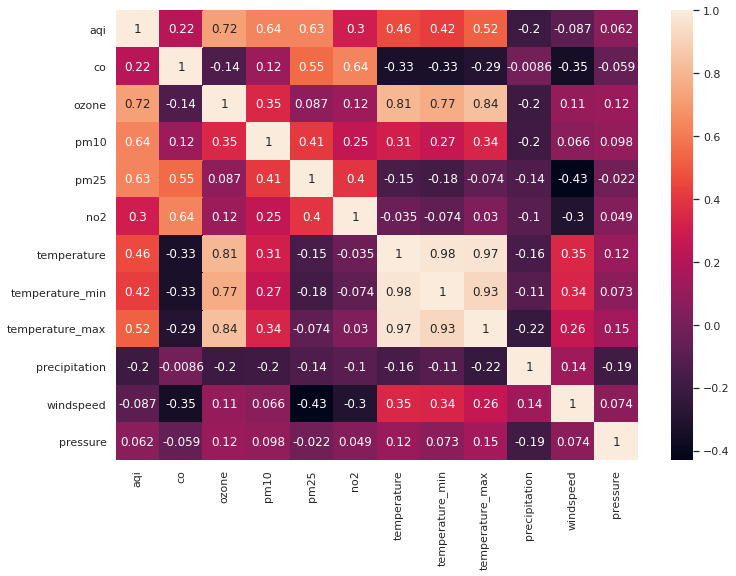

In [25]:
import seaborn as sns
corrMatrix = df.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrMatrix, annot=True)

# K-Means

In [0]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

[0: 'date', 1: 'aqi', 2: 'main pollutant', 3: 'location', 4: 'location id',
5: 'aqi source', 6: 'co', 7: 'ozone', 8: 'pm10', 9: 'pm25', 10: 'no2', 11: 'temperature', 12: 'temperature_min', 13: 'temperature_max', 14: 'precipitation', 15: 'windspeed', 16: 'pressure']

### Elbow method

In [0]:
def elbow_method():
    Error =[]
    x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(x)
        kmeans.fit(x)
        Error.append(kmeans.inertia_)
    plt.figure(figsize=(5,5))
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()
    

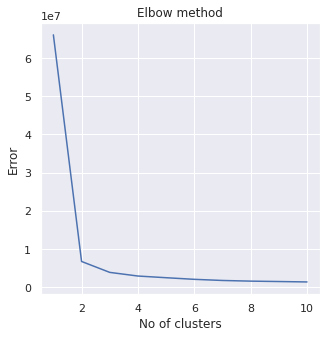

In [28]:
elbow_method()

### K-Means Clustering

In [29]:
x = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]].values
y = df.iloc[:, [1,6,7,8,9,10,11,12,13,14,15,16]]
col = y.columns

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
plt.figure(figsize=(5,5))
df['cluster'] = y_kmeans

# for i in range(0, 11):
#    for j in range(1, 12):
#      plt.scatter(x[:, i], x[:, j], y_kmeans, c=y_kmeans)
#      plt.scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 50, c = 'red')
#      plt.scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j], s = 50, c = 'blue')
#      plt.xlabel(col[i])
#      plt.ylabel(col[j])
#      plt.show()


<Figure size 360x360 with 0 Axes>

In [30]:
# df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                object
aqi                float64
main pollutant      object
location            object
location id         object
aqi source          object
co                 float64
ozone                int64
pm10               float64
pm25                 int64
no2                float64
temperature        float64
temperature_min    float64
temperature_max    float64
precipitation      float64
windspeed          float64
pressure           float64
cluster              int32
dtype: object

In [31]:
# Add columns with year, month, and weekday name
# df = df.set_index('date')
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.weekday_name
# # Display a random sampling of 5 rows
df.sample(5, random_state=5)
# select = df[df['cluster'] == 1]
# select.head()

,date,aqi,main pollutant,location,location id,aqi source,co,ozone,pm10,pm25,no2,temperature,temperature_min,temperature_max,precipitation,windspeed,pressure,cluster
531,06/15/2017,115.0,Ozone,Mojave,06-029-0011,AQS,3.0,115,44.0,54,33.0,27.3,20.0,35.6,0.0,9.4,1013.2,0
461,04/06/2017,87.0,Ozone,Mojave,06-029-0011,AQS,3.0,87,19.0,52,37.0,22.1,14.4,27.8,0.0,9.7,1012.5,0
793,03/04/2018,43.0,Ozone,Maricopa,06-029-0008,AQS,5.0,43,3.0,25,30.0,8.3,3.3,14.4,0.0,6.8,1024.2,0
663,10/25/2017,150.0,Ozone,Edison,06-029-0007,AQS,6.0,150,83.0,82,50.0,22.6,14.4,32.8,0.0,7.6,1014.0,0
654,10/16/2017,133.0,Ozone,Edison,06-029-0007,AQS,7.0,133,75.0,92,60.0,19.8,11.1,28.9,0.0,5.8,1019.4,0


# Standardizing data

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
#scaledDF = df[['ozone', 'co', 'temperature', 'windspeed', 'precipitation', 'pressure', 'pm10', 'pm25', 'no2']]
scaledDF = df[['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25', 'no2']]
scaler.fit(scaledDF.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
scaledDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2
0,37,8.0,4.4,6.5,1020.3,52.0,148,23.0
1,37,7.0,7.1,3.6,1017.9,14.0,113,25.0


In [35]:
scaler.mean_

array([ 72.77891855,   3.33675565,  19.91177276,   9.12984257,
       973.22600958,  34.38603696,  56.66666667,  25.39561944])

In [0]:
scaledDF = scaler.transform(scaledDF)

In [37]:
scaledDF = pd.DataFrame(data=scaledDF, columns=['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25', 'no2'])
scaledDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170


In [0]:
scaledDF['aqi'] = df['aqi']
scaledDF['date'] = df['date']

In [39]:
scaledDF.head(2)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,date
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856,148.0,01/01/2016
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,113.0,01/02/2016


In [0]:
def label_gen(x):
  if (x < 51):
    return 'Good'
  elif (x < 101):
    return 'Moderate'
  elif(x<151):
    return 'Unhealthy for sensitive groups'
  elif (x<201):
    return 'Unhealthy'
  elif (x<301):
    return 'Very Unhealthy'
  else:
    return 'Hazardous'

In [0]:
def label_category(x):
  if (x < 151):
    return 0
  else:
    return 1

In [0]:
scaledDF['AQILabel'] = scaledDF['aqi'].apply(func=label_gen)
scaledDF['AQICategory'] = scaledDF['aqi'].apply(func=label_category)

In [0]:
scaledDF['PAQI'] = scaledDF.aqi.shift(1)

In [0]:
scaledDF['AQILabel'] = pd.Categorical(scaledDF['AQILabel'])
scaledDF['AQILabel'] = scaledDF.AQILabel.cat.codes

In [45]:
scaledDF.head(5)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,date,AQILabel,AQICategory,PAQI
0,-0.982177,1.895100,-1.987936,-0.756273,0.233657,0.673889,3.137893,-0.200856,148.0,01/01/2016,4,0,NaN
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,113.0,01/02/2016,4,0,148.0
2,-1.009629,1.488709,-1.321522,0.681594,0.189977,-0.971239,0.801652,0.218359,80.0,01/03/2016,2,0,113.0
3,-0.982177,0.675927,-1.193365,-0.554971,0.176576,-1.009497,1.042147,0.218359,87.0,01/04/2016,2,0,80.0
4,-0.872372,0.675927,-0.949868,-0.439942,0.173598,-1.086015,-0.091617,0.386046,54.0,01/05/2016,2,0,87.0


In [0]:
scaledDF = scaledDF.drop([scaledDF.index[0]])

In [47]:
scaledDF.head(5)

,ozone,co,temperature,windspeed,pressure,pm10,pm25,no2,aqi,date,AQILabel,AQICategory,PAQI
1,-0.982177,1.488709,-1.641914,-1.590235,0.221745,-0.779945,1.935416,-0.033170,113.0,01/02/2016,4,0,148.0
2,-1.009629,1.488709,-1.321522,0.681594,0.189977,-0.971239,0.801652,0.218359,80.0,01/03/2016,2,0,113.0
3,-0.982177,0.675927,-1.193365,-0.554971,0.176576,-1.009497,1.042147,0.218359,87.0,01/04/2016,2,0,80.0
4,-0.872372,0.675927,-0.949868,-0.439942,0.173598,-1.086015,-0.091617,0.386046,54.0,01/05/2016,2,0,87.0
5,-0.872372,-0.543245,-1.244628,0.595322,-4.830723,-1.162533,-1.191025,0.302203,41.0,01/06/2016,0,0,54.0


# Applying ARIMA Model - Univariate

In [48]:
scaledDF['date'].min(), scaledDF['date'].max()

('01/01/2017', '12/31/2019')

### Setting date as index in timeseries data

In [49]:
scaledDF = scaledDF.set_index('date')
scaledDF.index

Index(['01/02/2016', '01/03/2016', '01/04/2016', '01/05/2016', '01/06/2016',
       '01/07/2016', '01/08/2016', '01/09/2016', '01/10/2016', '01/11/2016',
       ...
       '12/22/2019', '12/23/2019', '12/24/2019', '12/25/2019', '12/26/2019',
       '12/27/2019', '12/28/2019', '12/29/2019', '12/30/2019', '12/31/2019'],
      dtype='object', name='date', length=1460)

In [0]:
# scaledDF[["date"]] = scaledDF[["date"]].apply(pd.to_datetime)
# scaledDF.index = pd.to_datetime(scaledDF.index, unit='s')
scaledDF.index = pd.to_datetime(scaledDF.index)

In [51]:
scaledDF.dtypes

ozone          float64
co             float64
temperature    float64
windspeed      float64
pressure       float64
pm10           float64
pm25           float64
no2            float64
aqi            float64
AQILabel          int8
AQICategory      int64
PAQI           float64
dtype: object

### Plotting AQI Index

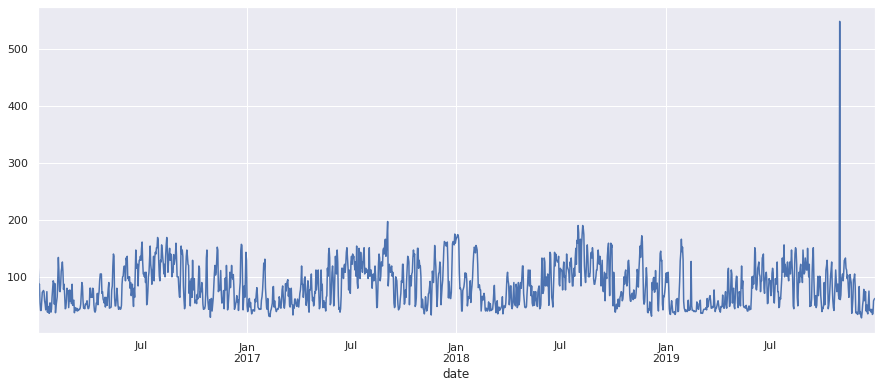

In [52]:
scaledDF['PAQI'].plot(figsize=(15, 6))
plt.show()

### Identifying and Removing the outlier

In [53]:
outlierIndex = scaledDF[ scaledDF['PAQI'] > 500].index
outlierIndex

DatetimeIndex(['2019-10-31'], dtype='datetime64[ns]', name='date', freq=None)

In [0]:
scaledDF.drop(outlierIndex , inplace=True)

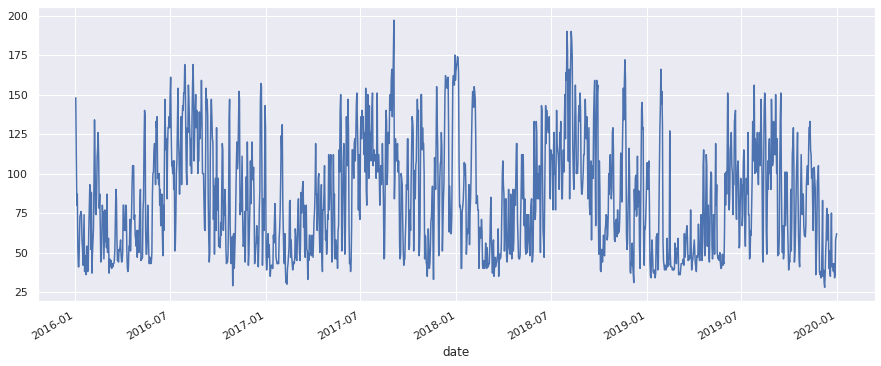

In [55]:
scaledDF['PAQI'].plot(figsize=(15, 6))
plt.show()

In [56]:
univariate = scaledDF['PAQI']
univariate

date
2016-01-02    148.0
2016-01-03    113.0
2016-01-04     80.0
2016-01-05     87.0
2016-01-06     54.0
              ...  
2019-12-27     34.0
2019-12-28     36.0
2019-12-29     58.0
2019-12-30     60.0
2019-12-31     62.0
Name: PAQI, Length: 1459, dtype: float64

In [57]:
pip install statsmodels

### Identifying season - trend - residual components in the timeseries data

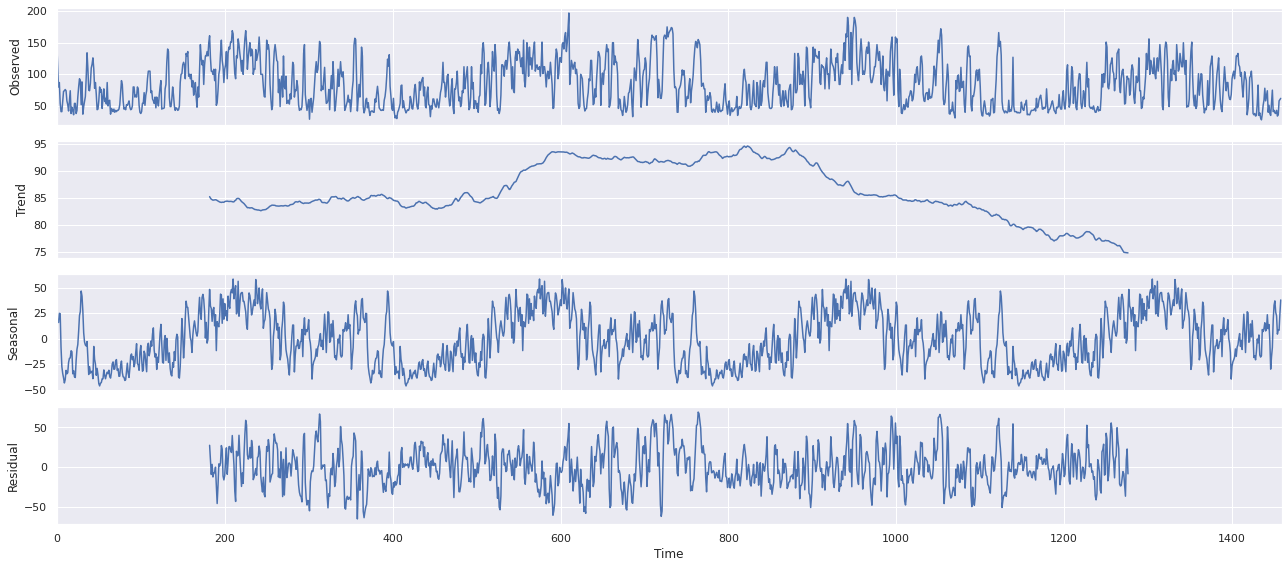

In [58]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(univariate.values, freq=365)
fig = decomposition.plot()
plt.show()

### Calculate Rolling deviation and mean in the data

In [59]:
rolMean = univariate.rolling(window=365).mean()
rolStd = univariate.rolling(window=365).std()
print(rolMean, rolStd)

date
2016-01-02          NaN
2016-01-03          NaN
2016-01-04          NaN
2016-01-05          NaN
2016-01-06          NaN
                ...    
2019-12-27    74.980822
2019-12-28    74.964384
2019-12-29    74.942466
2019-12-30    74.928767
2019-12-31    74.898630
Name: PAQI, Length: 1459, dtype: float64 date
2016-01-02          NaN
2016-01-03          NaN
2016-01-04          NaN
2016-01-05          NaN
2016-01-06          NaN
                ...    
2019-12-27    32.374392
2019-12-28    32.392703
2019-12-29    32.401490
2019-12-30    32.406762
2019-12-31    32.413674
Name: PAQI, Length: 1459, dtype: float64


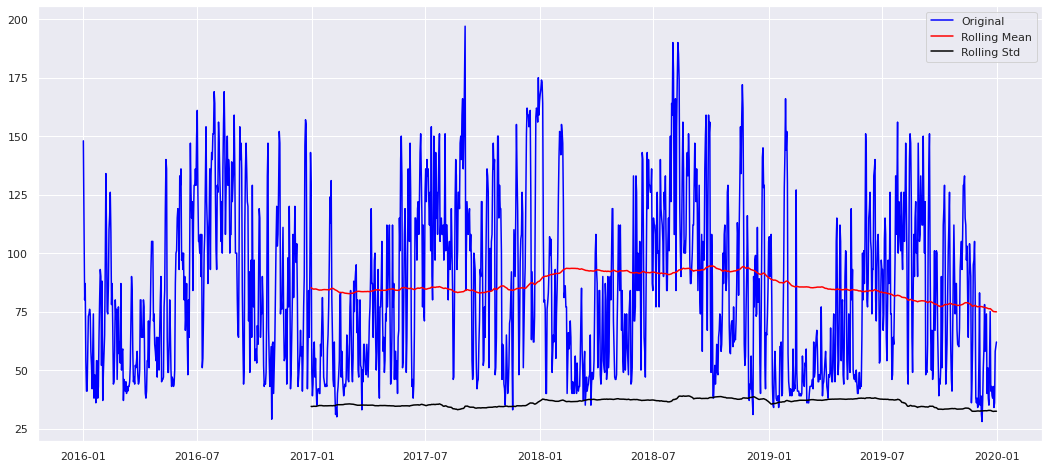

In [60]:
original = plt.plot(univariate, color = 'blue', label = 'Original')
mean = plt.plot(rolMean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolStd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('')
plt.show(block = False)

### Splitting the test - train set

In [61]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

univariate_train_test = univariate.values
size = int(len(univariate_train_test) * 0.80)
train, test = univariate_train_test[0:size], univariate_train_test[size:len(univariate_train_test)]
X = [x for x in train]

X = log(train)
X.shape

(1167,)

### Check if the data is stationary

In [62]:
result = adfuller(X, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Number of Lags Used: %f' % result[2])
print('Number of observations Used: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

ADF Statistic: -6.015172
p-value: 0.000000
Number of Lags Used: 8.000000
Number of observations Used: 1158.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
mean1=4.335042, mean2=4.386646
variance1=0.172683, variance2=0.205560


In [63]:
test.shape

(292,)

### Plotting ACF and PACF for identifying arguments of ARIMA model

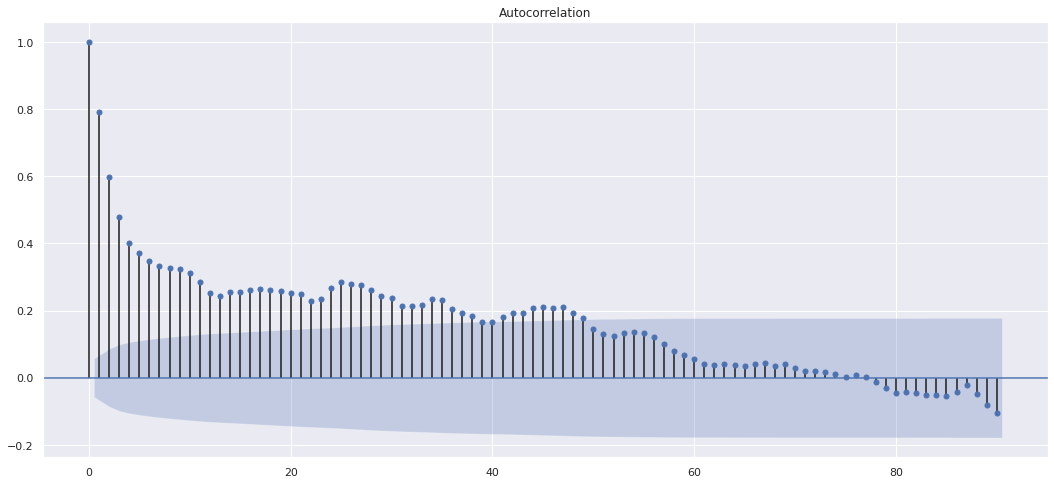

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
plot_acf(X, lags=90) #MA model - ARIMA(p, d, q) - determine p here, d - stationary
plt.show()

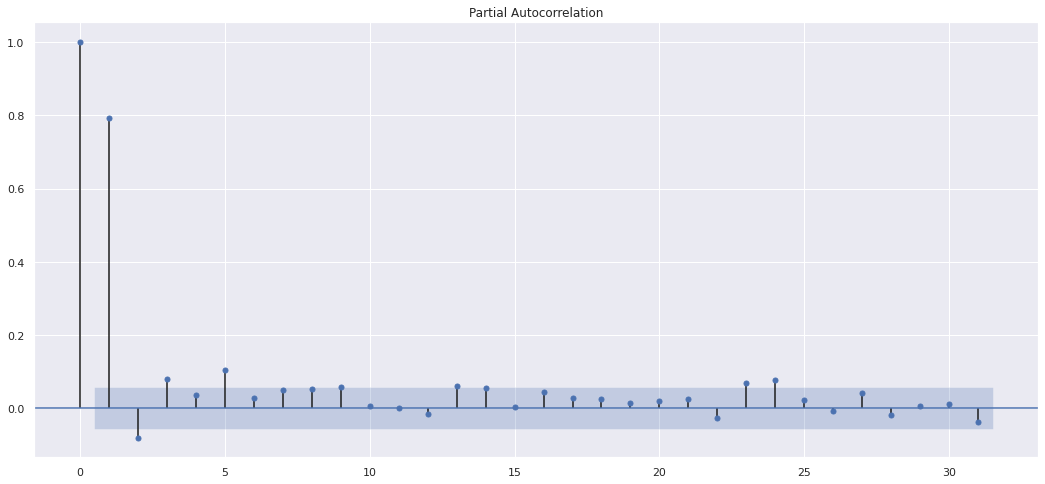

In [65]:
plot_pacf(X) #AR model - ARIMA(p, d, q) - d - stationary, q - determine in here using PACF
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


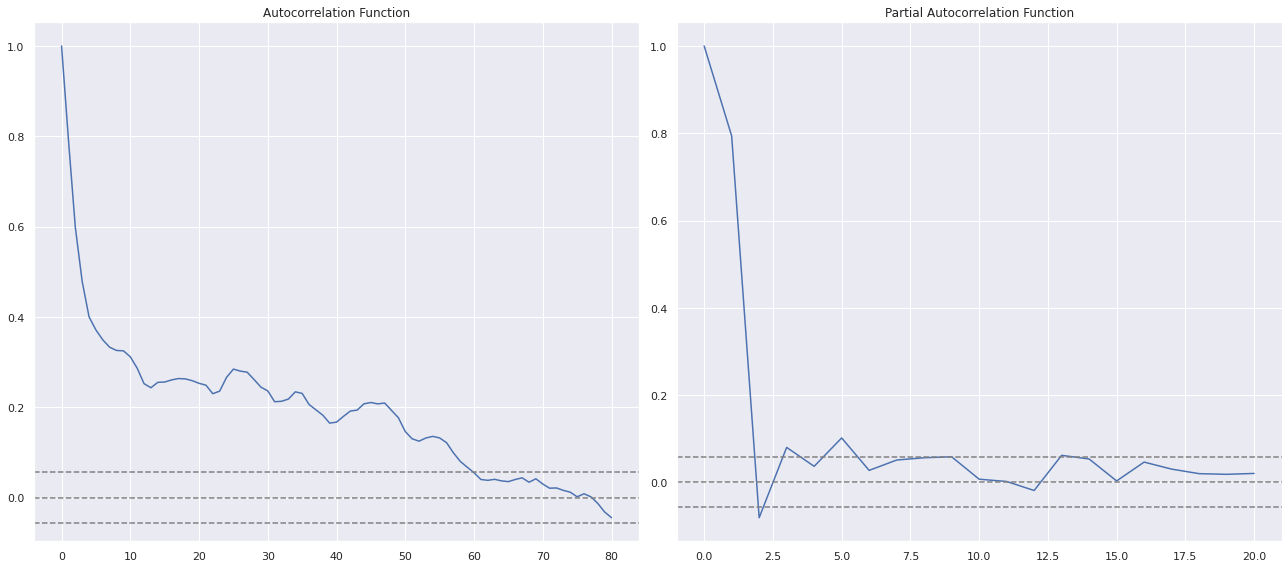

In [66]:
ts_log_diff = X
lag_acf = acf(ts_log_diff, nlags=80)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Use AR terms in the model when the:
1. ACF plots show autocorrelation decaying towards zero
2. PACF plot cuts off quickly towards zero
3. ACF of a stationary series shows positive at lag-1

### Apply the ARIMA model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


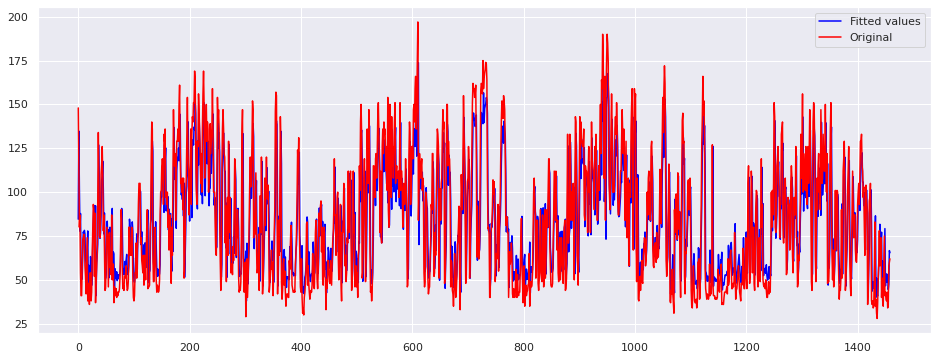

In [67]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(univariate.values, order=(1, 0, 1))  
results_ARIMA = model.fit() 

plt.figure(figsize=(16, 6))
ax = plt.gca()
ax = plt.subplot(111)

ax.plot(results_ARIMA.fittedvalues, color = 'blue', label='Fitted values')
ax.plot(univariate.values, color='red', label='Original')
plt.legend()


### Predicting the AQI Index for next 6 days

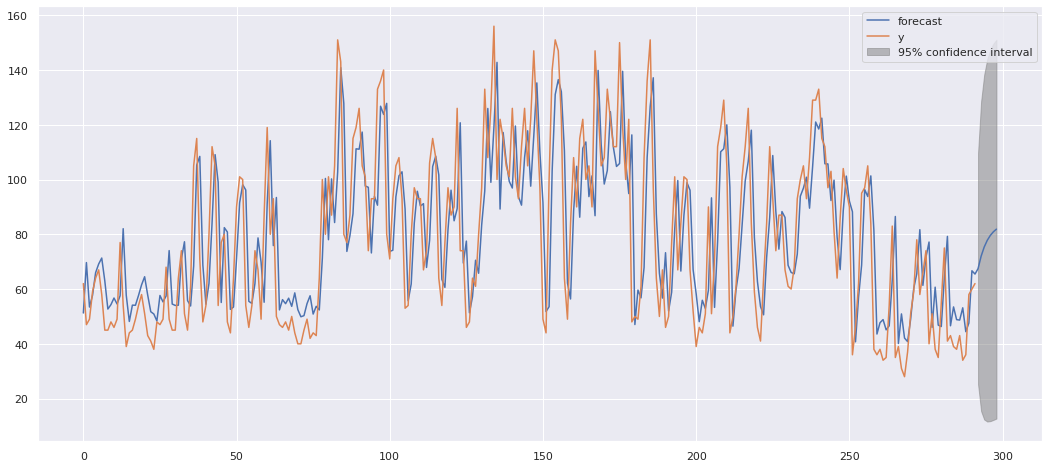

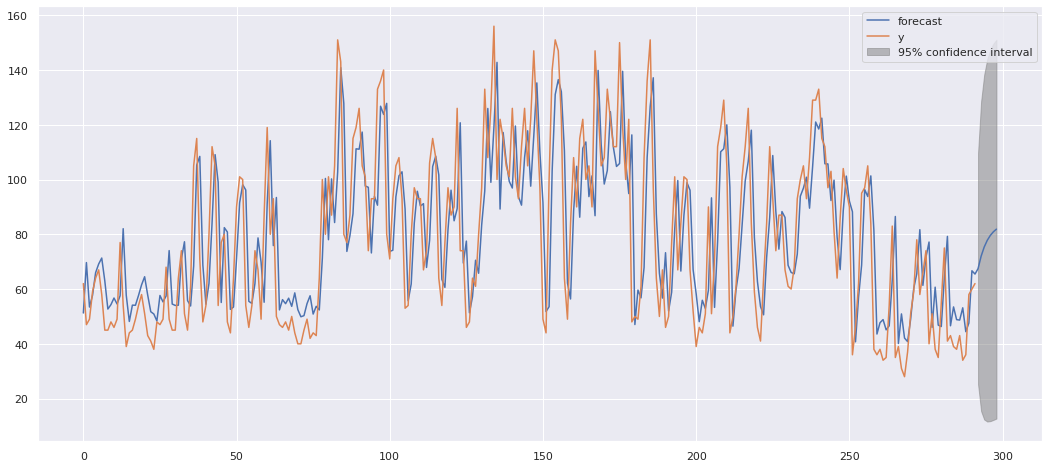

In [68]:
results_ARIMA.plot_predict(1167,1465)

In [0]:
line = ax.lines[0]
test_predicted = line.get_ydata()

### Calculating errors - RMSE and MSE

In [71]:
from math import sqrt
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, test_predicted[-292:])
print('Test MSE: %f' % error)
print('Test RMSE: %f' % sqrt(error))

Test MSE: 426.526891
Test RMSE: 20.652527


# Applying VAR Model - Multivariate

In [72]:
print(scaledDF.index)
print(scaledDF.shape)

DatetimeIndex(['2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
               '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09',
               '2016-01-10', '2016-01-11',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=1459, freq=None)
(1459, 12)


In [73]:
scaledDF.columns

Index(['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25',
       'no2', 'aqi', 'AQILabel', 'AQICategory', 'PAQI'],
      dtype='object')

In [74]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
johan_test_temp = scaledDF.drop(['AQILabel','AQICategory','aqi'], axis=1)
coint_johansen(scaledDF,-1,1).eig

array([0.39789827, 0.33642015, 0.3158035 , 0.27751781, 0.21411963,
       0.18251502, 0.16621332, 0.13400792, 0.08344899, 0.04772707,
       0.01858926, 0.00174617])

In [75]:
#creating the train and validation set
train = scaledDF[:int(0.8*(len(scaledDF)))]
valid = scaledDF[int(0.8*(len(scaledDF))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [76]:
model_fit.y

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[-9.82177294e-01,  1.48870884e+00, -1.64191353e+00, ...,
         4.00000000e+00,  0.00000000e+00,  1.48000000e+02],
       [-1.00962858e+00,  1.48870884e+00, -1.32152197e+00, ...,
         2.00000000e+00,  0.00000000e+00,  1.13000000e+02],
       [-9.82177294e-01,  6.75927220e-01, -1.19336535e+00, ...,
         2.00000000e+00,  0.00000000e+00,  8.00000000e+01],
       ...,
       [-8.99823439e-01, -1.36854400e-01, -1.18054969e+00, ...,
         0.00000000e+00,  0.00000000e+00,  4.40000000e+01],
       [-8.44920868e-01, -1.36854400e-01, -8.98605118e-01, ...,
         0.00000000e+00,  0.00000000e+00,  4.60000000e+01],
       [-8.17469583e-01, -5.43245210e-01, -1.06520873e+00, ...,
         2.00000000e+00,  0.00000000e+00,  4.20000000e+01]])

In [77]:
#converting predictions to dataframe
cols = ['ozone', 'co', 'temperature', 'windspeed', 'pressure', 'pm10', 'pm25', 'no2', 'PAQI']
pred = pd.DataFrame(index=range(0,len(prediction)), columns=[cols])
for j in range(0,9):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

for i in range(0,9):
    print('rmse value for', cols[i], 'is : ',sqrt(mean_squared_error(pred.iloc[:, i], valid.iloc[:,i])))

rmse value for ozone is :  0.892174340021665
rmse value for co is :  1.6339596422463625
rmse value for temperature is :  0.9170948885987507
rmse value for windspeed is :  1.0963068344718216
rmse value for pressure is :  0.8253669215981593
rmse value for pm10 is :  1.412092656665776
rmse value for pm25 is :  0.7578855907842146
rmse value for no2 is :  1.6771877493432743
rmse value for PAQI is :  41.36190925930495
